In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

In [4]:
np.random.seed(2)

# number = list(map(int,input('Input number:').strip().split()))
number = input('input number:').strip().split()

random_ls = []
# if number == 'random':
#     for i in range(0,5):
#         n = random.randint(0, 999)
#         random_ls.append(n)
#         print(random_ls)
# else:
print(number)
number_ls = [int(i) for i in number]

print(number_ls)
# print(number_ls[0])

# for i in range(len(number_ls)):
#     if len(str(number_ls[i])) > 1:
#         number_split = list(str(number_ls[i]))
#         print(len(str(number_ls[i])))
#         print(number_split)

input number: 12 34


['12', '34']
[12, 34]


In [14]:
number = input('input number:').strip().split()

if number[0] == 'random':
    print(number)

input number: random


['random']


In [4]:
numbers_ls = []
for i in range(0,5):
    n = random.randint(0, 999)
    numbers_ls.append(n)

print(numbers_ls)

[219, 489, 697, 661, 154]


In [13]:
# Train and Test knn Model

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

filename = "digits.png"
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)
    for digit in rowCells:
        digits.append(digit)

# convert list to np.array
digits = np.array(digits)
print("digits", digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print("labels", labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)
print("features", features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing
splitRatio = [2, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print("featureTrain", featureTrain.shape)
print("featureTest", featureTest.shape)
print("labelTrain", labelTrain.shape)
print("labelTest", labelTest.shape)

# Train the KNN model:
print("Training KNN model")
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k=4
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy k = {}: {}".format(k, accuracy))

(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (3333, 400)
featureTest (1667, 400)
labelTrain (3333,)
labelTest (1667,)
Training KNN model
Accuracy k = 4: 93.94121175764847


In [211]:
np.random.seed(2)

# number = list(map(int,input('Input number:').strip().split()))
number = input('input number:').strip().split()
print(number)
number_ls = [int(i) for i in number]

print(number_ls)
# print(number_ls[0])

number_split_ls = []

for i in range(len(number_ls)):
#     if len(str(number_ls[i])) > 1:
    number_split = [int(i) for i in list(str(number_ls[i]))]
    number_split_ls.append(number_split)
#         print(len(str(number_ls[i])))
    print(number_split_ls[i])

input number: 34 7852 0 2 3


['34', '7852', '0', '2', '3']
[34, 7852, 0, 2, 3]
[3, 4]
[7, 8, 5, 2]
[0]
[2]
[3]


In [242]:
number_split_ls[0][1]

4

[3, 4]


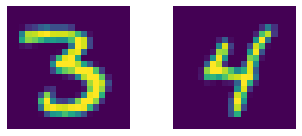

[7, 8, 5, 2]


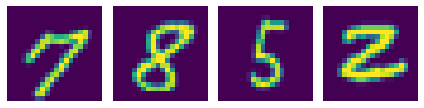

[0]


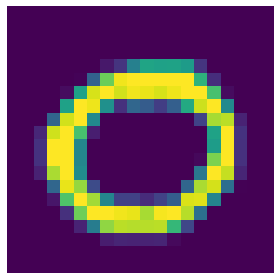

[2]


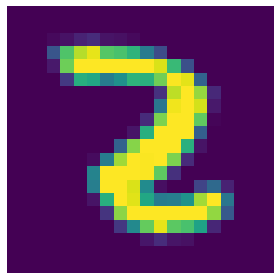

[3]


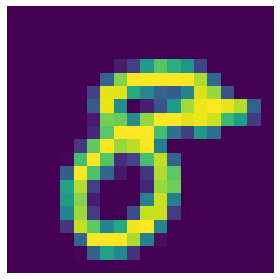

In [282]:
plt.figure(figsize=(5,2))

for i in range(len(number_split_ls)):
    for number in range(len(number_split_ls[i])):
    
        ind = np.where(prediction==number_split_ls[i][number])

        r_ind = random.choice(ind[0]).astype(int)
#         print('number:', number_split_ls[i][number])
        
#         print(r_ind)
#         print(len(number_split_ls[i]))
        
        ft = featureTest.reshape((-1,20,20)) 
        img = ft[r_ind]
#         img_ls = img.append(img)

        a,b = 1, len(number_split_ls[i])
        
        plt.subplot(a,b,number+1)
        plt.imshow(img)
        plt.axis('off')
    
    print(number_split_ls[i])
    plt.tight_layout()
    plt.show()    


In [285]:
featureTest[:,:,::-1]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

number: 1
number: 7
number: 1
number: 5
number: 7
number: 9
number: 4


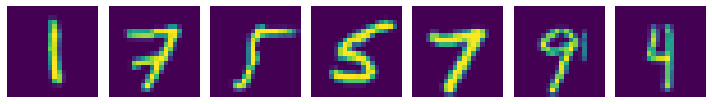

In [212]:
t = [1,7,1,5,7,9,4]
match = []
a,b = 1, len(t)

plt.figure(figsize=(10,5))
for numbers in range(len(t)):
    ind = np.where(prediction==t[numbers])
#     int(ind)
       
    r_ind = random.choice(ind[0]).astype(int)
#     print(ind[0])
    print('number:', t[numbers])
    ft = featureTest.reshape((-1,20,20)) 
    img = ft[r_ind]
    plt.subplot(a,b, numbers+1)  
    
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


# for numbers in t:
#     a_list = [x for ind, x in enumerate(prediction) if x==numbers]
#     a = int(random.randrange(len(a_list)))
#     match.append(a_list[a])
#     print(a, a_list[a])


In [111]:
match

[array([1.], dtype=float32),
 array([7.], dtype=float32),
 array([4.], dtype=float32)]

In [112]:
for n in range(len(number)):
    if t[n] in match:
        print('yahoo',t[n])
        plt.imshow()
    else:
        print('noo')

yahoo 1
yahoo 7
yahoo 4


In [68]:
digits.shape

(5000, 20, 20)

In [70]:
ft = featureTest.reshape((-1,20,20))

In [80]:
prediction.shape

(1667, 1)

In [79]:
len(a_list)

149

In [118]:
ind = np.where(prediction==8)
ind

(array([   0,   30,   37,   58,   64,   74,  100,  101,  105,  119,  124,
         144,  165,  183,  194,  207,  213,  243,  253,  254,  262,  265,
         282,  294,  309,  312,  316,  335,  357,  367,  385,  407,  409,
         410,  415,  416,  433,  449,  452,  456,  462,  471,  486,  489,
         493,  504,  517,  531,  578,  587,  592,  617,  618,  637,  649,
         671,  673,  675,  683,  686,  688,  689,  697,  709,  733,  734,
         743,  753,  756,  757,  780,  786,  790,  801,  805,  807,  823,
         826,  842,  890,  933,  936,  974,  975,  987, 1003, 1010, 1031,
        1060, 1063, 1068, 1095, 1099, 1114, 1138, 1155, 1156, 1161, 1166,
        1172, 1186, 1191, 1192, 1203, 1219, 1225, 1229, 1236, 1296, 1297,
        1300, 1309, 1312, 1362, 1368, 1371, 1373, 1380, 1405, 1408, 1409,
        1418, 1471, 1488, 1497, 1502, 1512, 1515, 1530, 1542, 1550, 1569,
        1573, 1575, 1612, 1628, 1630, 1633, 1634, 1636, 1651, 1658, 1666],
       dtype=int64),
 array([0, 0, 0,

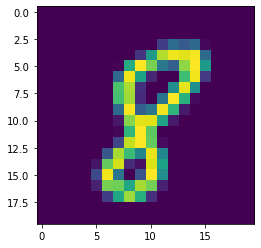

In [121]:
plt.imshow(ft[37])

In [56]:
labelTest.shape

(1667,)

no
